# <span style="color: green;">Credit Card Report</span>


## **Transaction Report**

#### Import Data 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
cr = pd.read_csv("C:/Users/ASUS/Downloads/credit_card.csv")
cust = pd.read_csv("C:/Users/ASUS/Downloads/customer.csv")

cr['Client_Num'].count(), cust['Client_Num'].count()

(10108, 10108)

#### Changing Data Types

In [2]:
cr['Week_Start_Date'] = pd.to_datetime(cr['Week_Start_Date'],format = '%d-%m-%Y')
cr.head()

,Client_Num,Card_Category,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,Week_Start_Date,Week_Num,Qtr,current_year,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Vol,Avg_Utilization_Ratio,Use Chip,Exp Type,Interest_Earned,Delinquent_Acc
0,708082083,Blue,200,0,87,2023-01-01,Week-1,Q1,2023,3544.0,1661,15149,111,0.469,Chip,Travel,4393.21,0
1,708083283,Blue,445,1,108,2023-01-01,Week-1,Q1,2023,3421.0,2517,992,21,0.736,Swipe,Entertainment,69.44,0
2,708084558,Blue,140,0,106,2023-01-01,Week-1,Q1,2023,8258.0,1771,1447,23,0.214,Chip,Bills,202.58,0
3,708085458,Blue,250,1,150,2023-01-01,Week-1,Q1,2023,1438.3,0,3940,82,0.000,Online,Grocery,236.40,0
4,708086958,Blue,320,1,106,2023-01-01,Week-1,Q1,2023,3128.0,749,4369,59,0.239,Swipe,Fuel,1004.87,1


In [97]:
cust.head()

,Client_Num,Customer_Age,Gender,Dependent_Count,Education_Level,Marital_Status,state_cd,Zipcode,Car_Owner,House_Owner,Personal_loan,contact,Customer_Job,Income,Cust_Satisfaction_Score
0,708082083,24,F,1,Uneducated,Single,FL,91750,no,yes,no,unknown,Businessman,202326,3
1,708083283,62,F,0,Unknown,Married,NJ,91750,no,no,no,cellular,Selfemployeed,5225,2
2,708084558,32,F,1,Unknown,Married,NJ,91750,yes,no,no,unknown,Selfemployeed,14235,2
3,708085458,38,M,2,Uneducated,Single,NY,91750,no,no,no,cellular,Blue-collar,45683,1
4,708086958,48,M,4,Graduate,Single,TX,91750,yes,yes,no,cellular,Businessman,59279,1


#### Appending data from Another file

In [4]:
cr_add = pd.read_csv("C:/Users/ASUS/Downloads/cc_add.csv")
cust_add = pd.read_csv("C:/Users/ASUS/Downloads/cust_add.csv")

crn = pd.concat([cr,cr_add],ignore_index = True)

custn = pd.concat([cust,cust_add],ignore_index = True)


In [5]:
crn['Week_Start_Date'] = pd.to_datetime(crn['Week_Start_Date'],format = '%d-%m-%Y')

### <span style="color: maroon;">**KPI's**</span>

#### Total Transaction amount

In [6]:
crn['Total_Trans_Amt'].sum()

45533021

#### Total Interest Earned

In [7]:
crn['Interest_Earned'].sum().round(2)

7982479.81

#### Average customer satisfaction rate (CSS)

In [8]:
custn['Cust_Satisfaction_Score'].mean().round(2)

3.19

#### Total Revenue
*Tolal Revenue: Tatal Transaction Amount + annual Fees + Interest Earned*


In [29]:
income_sum_millions = combined['revenue'].sum() / 1_000_000

# Format the result with commas for thousands separators
formatted_income_sum = "{:,.2f} million".format(income_sum_millions)

print(formatted_income_sum)

56.52 million


###  <span style="color: maroon;">**VISUALIZATION's**</span>

#### Table

In [10]:
crn_by_card_category = crn.groupby('Card_Category')[['Total_Trans_Amt','Interest_Earned','Annual_Fees']].sum()
crn_by_card_category

,Total_Trans_Amt,Interest_Earned,Annual_Fees
Card_Category,,,
Blue,37840749,6614172.62,2733690
Gold,2091362,384755.16,57565
Platinum,953314,161629.05,20665
Silver,4647596,821922.98,189590


#### Revenue by Expenditure Type


In [11]:
# joined Two Tables
combined = pd.merge(crn,custn,on = 'Client_Num',how = 'inner')

In [30]:
combined['revenue'] = combined['Total_Trans_Amt'] + combined['Interest_Earned'] + combined['Annual_Fees']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19320\1349698314.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue(Million)', y='Exp Type', data=rev_by_exp, palette='viridis')


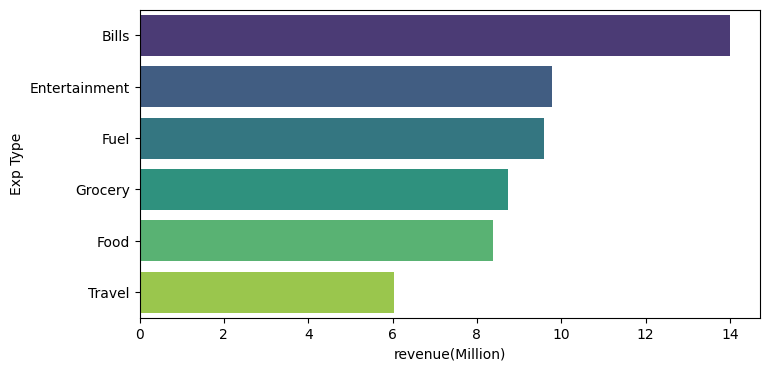

In [96]:
rev_by_exp = combined.groupby(['Exp Type'])['revenue'].sum().reset_index()
rev_by_exp.sort_values(by = 'revenue',ascending = False,inplace = True)
rev_by_exp['revenue(Million)'] = rev_by_exp['revenue']/1000000

plt.figure(figsize=(8,4))
sns.barplot(x='revenue(Million)', y='Exp Type', data=rev_by_exp, palette='viridis')
plt.show()

#### Revenue by Education

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19320\723800004.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue(Million)',y='Education_Level', data=rev_by_edu, palette='viridis')


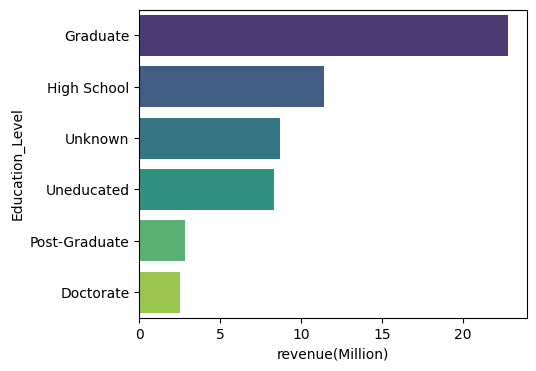

In [95]:
rev_by_edu = combined.groupby(['Education_Level'])['revenue'].sum().reset_index()
rev_by_edu.sort_values(by = 'revenue',ascending = False,inplace = True)
rev_by_edu['revenue(Million)'] = rev_by_edu['revenue'] /1000000

plt.figure(figsize=(5, 4))
sns.barplot(x='revenue(Million)',y='Education_Level', data=rev_by_edu, palette='viridis')
plt.show()

#### Revenue by Customer Job

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19320\1859223436.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue(Million)', y='Customer_Job', data=rev_by_cust_job, palette='viridis')


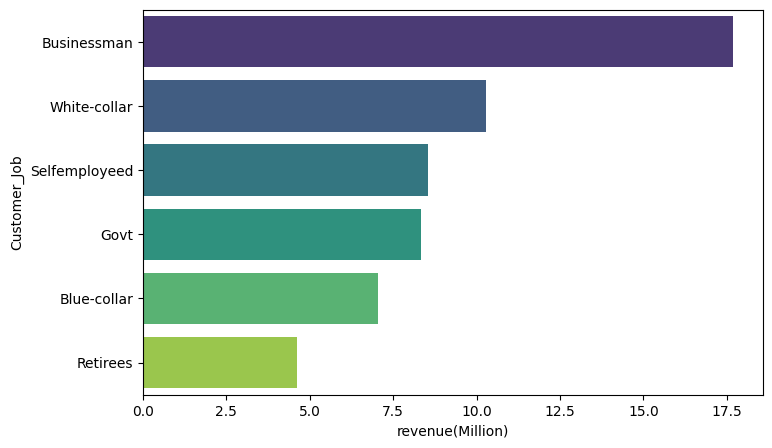

In [94]:
rev_by_cust_job = combined.groupby(['Customer_Job'])['revenue'].sum().reset_index()
rev_by_cust_job.sort_values(by = 'revenue',ascending = False,inplace = True)
rev_by_cust_job['revenue(Million)'] = rev_by_cust_job['revenue']/1000000

plt.figure(figsize=(8, 5))
sns.barplot(x='revenue(Million)', y='Customer_Job', data=rev_by_cust_job, palette='viridis')
plt.show()

#### Revenue by Use chip

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19320\1821474694.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Use Chip', y='revenue(Million)', data=rev_chip, palette='viridis')


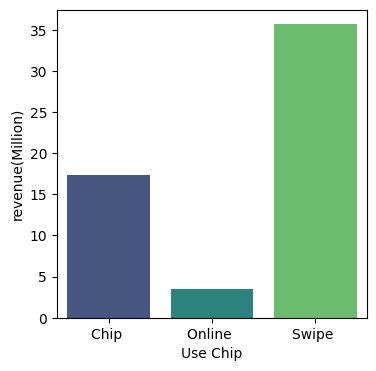

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
rev_chip = combined.groupby('Use Chip')['revenue'].sum().reset_index()
rev_chip['revenue(Million)'] = rev_chip['revenue']/1000000

# Create bar plot
plt.figure(figsize=(4, 4))
sns.barplot(x='Use Chip', y='revenue(Million)', data=rev_chip, palette='viridis')

plt.show()

#### Customer Aquisition Cost Of each Card Category

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19320\2521847910.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Card_Category',y = 'Customer_Acq_Cost',data = cust_aqui,palette='viridis')


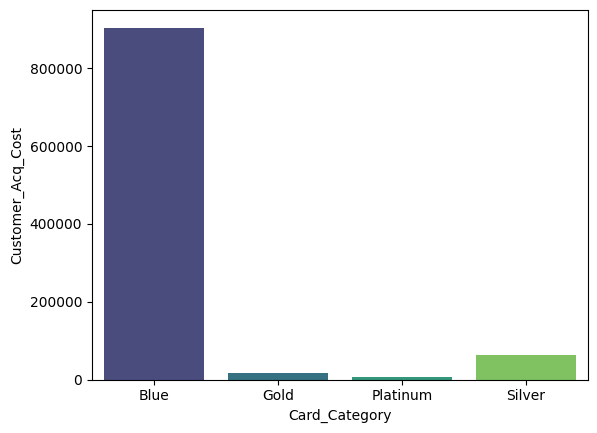

In [40]:
cust_aqui = combined.groupby('Card_Category')['Customer_Acq_Cost'].sum().reset_index()
sns.barplot(x='Card_Category',y = 'Customer_Acq_Cost',data = cust_aqui,palette='viridis')
plt.show()

#### Quarter revenue and Transaction Count

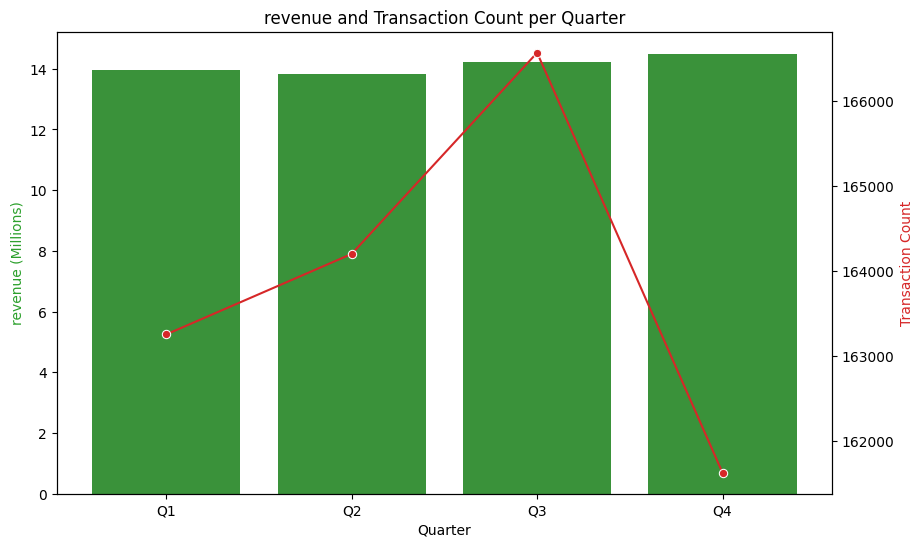

In [41]:
qtr_rev = combined.groupby('Qtr').agg({'revenue':'sum','Total_Trans_Vol':'sum'}).reset_index()
qtr_rev['revenue_million']= qtr_rev['revenue']/1000000

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for income
color = 'tab:green'
ax1.set_xlabel('Quarter')
ax1.set_ylabel('revenue (Millions)', color=color)
sns.barplot(x='Qtr', y='revenue_million', data=qtr_rev, color=color, ax=ax1)


# Create a second y-axis for transaction count
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Transaction Count', color=color)
sns.lineplot(x='Qtr', y='Total_Trans_Vol', data=qtr_rev, marker='o', color=color, ax=ax2)


plt.title('revenue and Transaction Count per Quarter')
plt.show()

## **Customer Report**

#### Creating Conditional Columns

In [19]:
# Created Age category column for better Analysis
combined.loc[(combined['Customer_Age'] <= 30), 'age_category'] = '20-30'
combined.loc[(combined['Customer_Age'] >= 30) & (combined['Customer_Age'] < 40), 'age_category'] = '30-40'
combined.loc[(combined['Customer_Age'] >= 40) & (combined['Customer_Age'] < 50), 'age_category'] = '40-50'
combined.loc[(combined['Customer_Age'] >= 50) & (combined['Customer_Age'] < 60), 'age_category'] = '50-60'
combined.loc[(combined['Customer_Age'] >= 60), 'age_category'] = '60+'

In [20]:
# Created Income category column
combined.loc[(combined['Income']<35000),'income_group']='Low'
combined.loc[(combined['Income']>=35000) & (combined['Income']<70000),'income_group']='Medium'
combined.loc[(combined['Income']>=70000),'income_group']='High'


### <span style="color: maroon;">**KPI**</span>

#### Average Customer Satisfaction Rate(CSS)

In [22]:
combined['Cust_Satisfaction_Score'].mean().round(2)

3.19

### <span style="color: maroon;">**VISUALIZATION**</span>

#### Table Of Customer job

In [52]:
cust_job = combined.groupby('Customer_Job').agg({'revenue':'sum','Interest_Earned':'sum','Income':'sum'}).sort_values(by = 'revenue',ascending = False)
cust_job

,revenue,Interest_Earned,Income
Customer_Job,,,
Businessman,17697472.01,2584604.01,190350431
White-collar,10283123.92,1464690.92,105618475
Selfemployeed,8542826.40,1141510.40,77659931
Govt,8335533.84,1182230.84,90834727
Blue-collar,7040606.42,967751.42,73516911
Retirees,4617448.22,641692.22,49619308


#### Revenue by Marital Status

[]

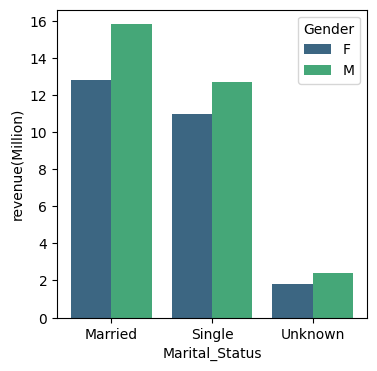

In [92]:
rev_marital_status = combined.groupby(['Marital_Status','Gender'])['revenue'].sum().reset_index()
rev_marital_status['revenue(Million)'] = rev_marital_status['revenue']/1000000

plt.figure(figsize = (4,4))
sns.barplot(x ='Marital_Status',y = 'revenue(Million)',data = rev_marital_status,hue ='Gender', palette = 'viridis'  )
plt.plot()


#### Transactions(Amount Disbursed) by Dependent Count

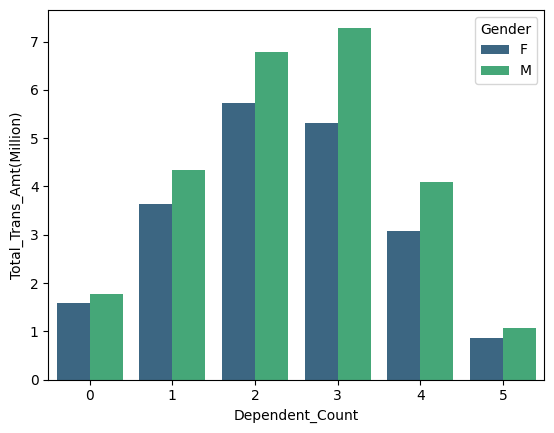

In [90]:
Tra_by_dep = combined.groupby(['Dependent_Count','Gender'])['Total_Trans_Amt'].sum().reset_index()
Tra_by_dep['Total_Trans_Amt(Million)'] = Tra_by_dep['Total_Trans_Amt']/1000000

sns.barplot(x = 'Dependent_Count',y ='Total_Trans_Amt(Million)',data =  Tra_by_dep,hue = 'Gender', palette = 'viridis')
plt.show()

#### Transaction Amount and count as per Income Group 

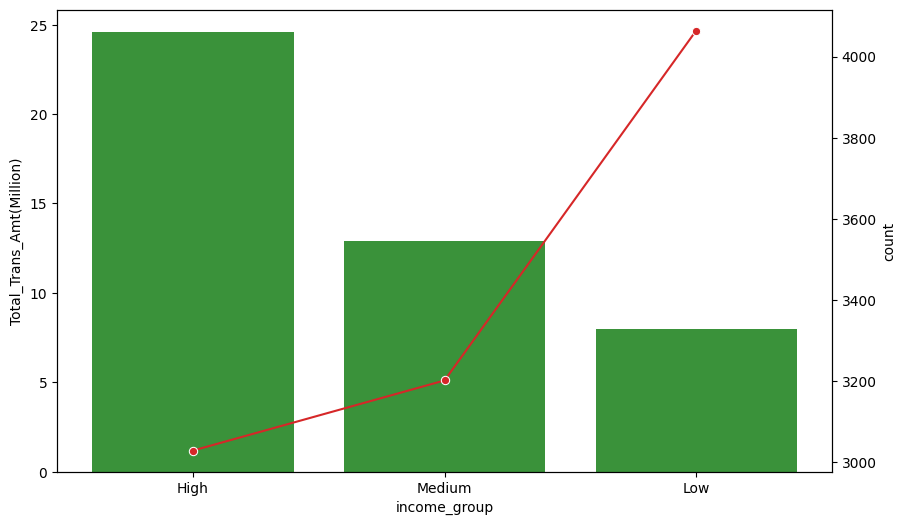

In [87]:
income_group_amt = combined.groupby('income_group').agg({'Total_Trans_Amt':'sum','Client_Num':'count'})
income_group_amt = income_group_amt.sort_values(by = 'Total_Trans_Amt',ascending = False)
income_group_amt.rename(columns = {'Client_Num':'count'},inplace = True)
income_group_amt['Total_Trans_Amt(Million)'] = income_group_amt['Total_Trans_Amt']/1000000

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for income
color = 'tab:green'
sns.barplot(x='income_group', y='Total_Trans_Amt(Million)', data=income_group_amt, color=color, ax=ax1)


# Create a second y-axis for transaction count
ax2 = ax1.twinx()
color = 'tab:red'

sns.lineplot(x='income_group', y='count',data = income_group_amt, marker='o', color=color, ax=ax2)

plt.show()

#### Top 5 States by Revenue

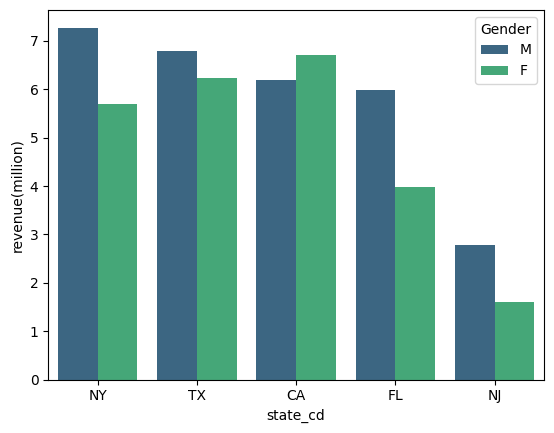

In [86]:
Top_states = combined.groupby(['state_cd','Gender'])['revenue'].sum().reset_index()
Top_states = Top_states.nlargest(10,'revenue')
Top_states['revenue(million)'] = Top_states['revenue']/1000000

sns.barplot(x= 'state_cd', y = 'revenue(million)',data = Top_states,hue = 'Gender',palette = 'viridis')
plt.show()

#### Revenue By 

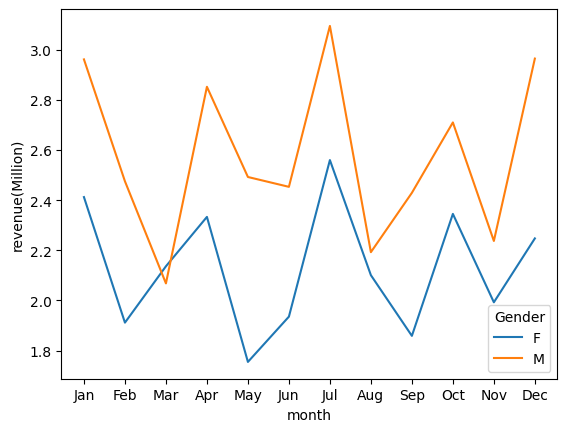

In [83]:
combined = combined.sort_values('Week_Start_Date')
combined['month_no'] = combined['Week_Start_Date'].dt.month
combined['month'] = combined['Week_Start_Date'].dt.strftime('%b')

rev_weekly = combined.groupby(['month','month_no','Gender'])['revenue'].sum().reset_index()
rev_weekly = rev_weekly.sort_values(by = 'month_no')
rev_weekly['revenue(Million)'] = rev_weekly['revenue']/1000000

sns.lineplot(x = 'month', y = 'revenue(Million)', data = rev_weekly,hue = 'Gender')



plt.show()